# 나이브베이즈 분류
* 베이즈이론(베이지안 확률)
  * A가 일어났을 때 B가 일어날 확률
  * 메일 제목에 '무료'라는 단어가 들어있을 때 스펨 메일일 확률
  * 주관적으로 확률을 해석
  * 데이터를 통해서 확률을 추정할 때 현재 관측된 데이터의 빈도만으로 분석하는 것이 아니라 분석자의 사전지식(혹의 알려진 사실, 분석자의 주관) 까지 포함해 부석하는 방법
  * 베이즈 정리에서 확률은 '주장' 혹은 '믿음의 신뢰도'로 나타난다.
* 나이브 베이즈 분류 모델은 베이즈 정리를 기반으로 한 지도학습 모델로, 스펨 메일 필터링, 텍스트 분류 등에 사용된다.
* 나이브 베이즈는 데이터의 모든 특성 변수가 서로 동등하고 독립적이라는 가정하에 분류를 실행한다.
* 독립 변수의 특성들은 나이브 베이즈 분류기에서 서로 연관성이 없고, 각각의 특성이 독립적으로 기여하는 것으로 간주한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


In [3]:
data.isna().sum()

Daily Time Spent on Site     0
Age                         84
Area Income                  0
Daily Internet Usage         0
Ad Topic Line                0
City                         0
Male                         0
Country                      0
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [4]:
data.groupby('Age')['Clicked on Ad'].value_counts()

Age   Clicked on Ad
19.0  0                5
      1                1
20.0  0                5
      1                1
21.0  0                5
                      ..
57.0  1                6
58.0  1                4
59.0  1                2
60.0  1                4
61.0  1                1
Name: count, Length: 76, dtype: int64

In [5]:
data2 = data[data['Age'].isna() == False]

In [6]:
data2['Age'].describe()

count    916.000000
mean      36.128821
std        9.018548
min       19.000000
25%       29.000000
50%       35.000000
75%       42.000000
max       61.000000
Name: Age, dtype: float64

In [7]:
def ages(x):
    if x < 20:
        return '10s'
    elif 20 <= x < 30:
        return '20s'
    elif 30 <= x < 40:
        return '30s'
    elif 40 <= x < 50:
        return '40s'
    elif 50 <= x < 60:
        return '50s'
    elif 60 <= x < 70:
        return '60s'

In [8]:
data2['Age'] = data2['Age'].apply(ages)

C:\Users\hi\AppData\Local\Temp\ipykernel_9272\3509914117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Age'] = data2['Age'].apply(ages)


In [9]:
data2['Age']

1      30s
2      20s
3      20s
4      30s
5      20s
      ... 
995    30s
996    40s
997    50s
998    10s
999    20s
Name: Age, Length: 916, dtype: object

In [10]:
data2.groupby('Age')['Clicked on Ad'].value_counts(sort=False)

Age  Clicked on Ad
10s  0                  5
     1                  1
20s  0                183
     1                 61
30s  0                211
     1                143
40s  0                 51
     1                169
50s  0                  4
     1                 83
60s  1                  5
Name: count, dtype: int64

In [11]:
data2.loc[data2['Age'] == '50s', 'Ad Topic Line']

22           Mandatory disintermediate utilization
27                  Monitored systematic hierarchy
32                     Digitized global capability
34             Synchronized dedicated service-desk
36                         Profound stable product
                          ...                     
965                       Intuitive global website
966    Exclusive disintermediate Internet solution
972                   Switchable real-time product
980          Focused incremental Graphic Interface
997                   Expanded intangible solution
Name: Ad Topic Line, Length: 87, dtype: object

In [12]:
data.loc[(data['Age'].isna() == True) & (data['Clicked on Ad'] == 0)] = '10s'

In [13]:
data.loc[(data['Age'].isna() == True) & (data['Clicked on Ad'] == 1)] = '50s'

In [14]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,10s,10s,10s,10s,10s,10s,10s,10s,10s,10s
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.5,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


In [48]:
data2['Age'] = data['Age']

C:\Users\hi\AppData\Local\Temp\ipykernel_9272\1507064382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Age'] = data['Age']


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Daily Time Spent on Site  1000 non-null   object
 1   Age                       916 non-null    object
 2   Area Income               1000 non-null   object
 3   Daily Internet Usage      1000 non-null   object
 4   Ad Topic Line             1000 non-null   object
 5   City                      1000 non-null   object
 6   Male                      1000 non-null   object
 7   Country                   1000 non-null   object
 8   Timestamp                 1000 non-null   object
 9   Clicked on Ad             1000 non-null   object
dtypes: object(10)
memory usage: 78.2+ KB


In [52]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000,916.0,1000,1000,1000,1000,1000,1000,1000,1000
unique,835,43.0,918,887,918,892,4,237,916,4
top,10s,31.0,10s,10s,10s,10s,0,10s,10s,1
freq,46,53.0,46,46,46,46,475,46,46,462


<Axes: >

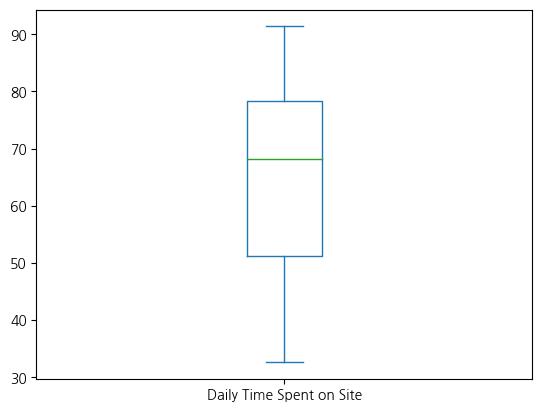

In [53]:
data2['Daily Time Spent on Site'].plot(kind='box')

<Axes: >

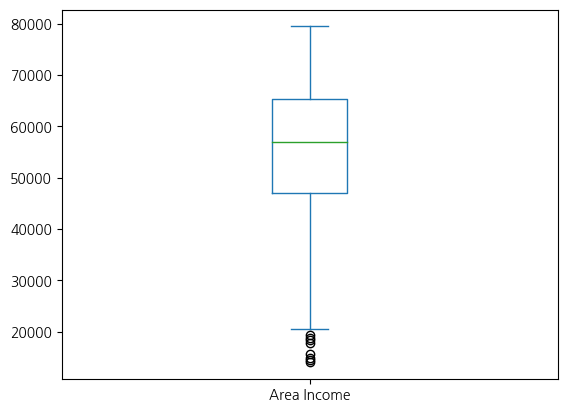

In [23]:
data2['Area Income'].plot(kind='box')

<Axes: >

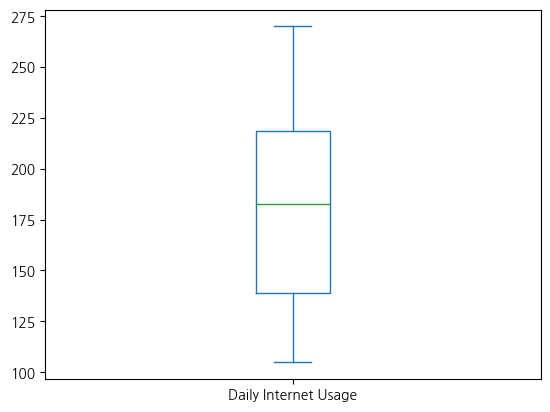

In [24]:
data2['Daily Internet Usage'].plot(kind='box')

In [19]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

<Axes: xlabel='Age'>

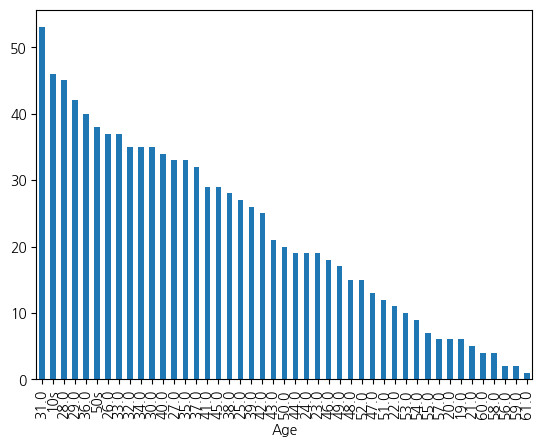

In [40]:
data['Age'].value_counts().plot(kind='bar')

<Axes: xlabel='Male'>

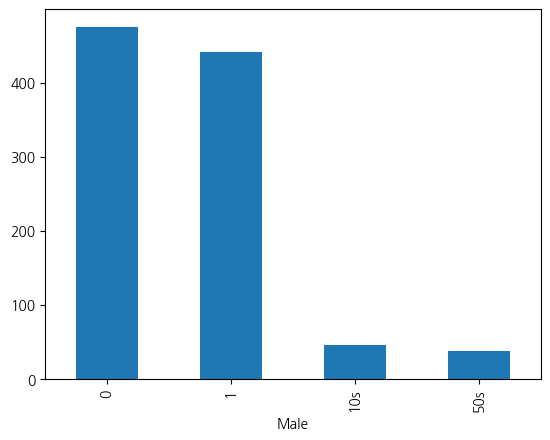

In [26]:
data['Male'].value_counts().plot(kind='bar')

In [29]:
data2['Country'].nunique()

235

In [30]:
data2['Clicked on Ad'].value_counts()

Clicked on Ad
1    462
0    454
Name: count, dtype: int64

C:\Users\hi\AppData\Local\Temp\ipykernel_9272\2749257783.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Area Income'])


<Axes: xlabel='Area Income', ylabel='Density'>

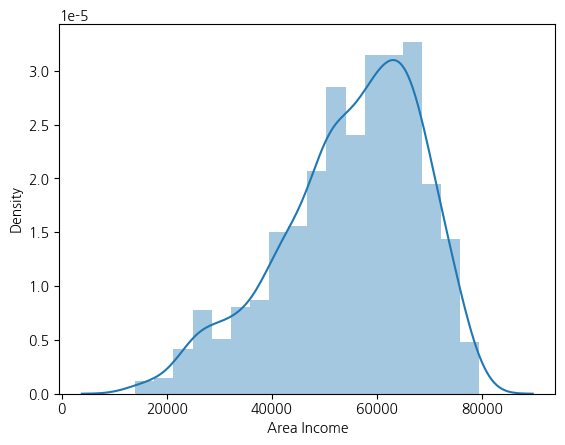

In [32]:
sns.distplot(data2['Area Income'])

In [33]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [36]:
X = data2.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)
y = data2['Clicked on Ad']

In [37]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
1,80.23,31.0,68441.85,193.77,1
2,69.47,26.0,59785.94,236.50,0
3,74.15,29.0,54806.18,245.89,1
4,68.37,35.0,73889.99,225.58,0
5,59.99,23.0,59761.56,226.74,1


In [38]:
X = pd.get_dummies(X, drop_first = True)
X

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Age_20.0,Age_21.0,Age_22.0,Age_23.0,Age_24.0,Age_25.0,...,Age_52.0,Age_53.0,Age_54.0,Age_55.0,Age_56.0,Age_57.0,Age_58.0,Age_59.0,Age_60.0,Age_61.0
1,80.23,68441.85,193.77,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,69.47,59785.94,236.50,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,74.15,54806.18,245.89,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,68.37,73889.99,225.58,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,59.99,59761.56,226.74,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,71384.57,208.58,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,51.30,67782.17,134.42,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,51.63,42415.72,120.37,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,55.55,41920.79,187.95,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Age_20.0,Age_21.0,Age_22.0,Age_23.0,Age_24.0,Age_25.0,...,Age_52.0,Age_53.0,Age_54.0,Age_55.0,Age_56.0,Age_57.0,Age_58.0,Age_59.0,Age_60.0,Age_61.0
0,0.967616,1.011956,0.319805,1.037833,-0.0812,-0.074084,-0.110248,-0.145539,-0.145539,-0.174273,...,-0.129028,-0.10506,-0.099613,-0.087754,-0.046778,-0.0812,-0.066227,-0.046778,-0.066227,-0.033059
1,0.289413,0.358762,1.300011,-0.963546,-0.0812,-0.074084,-0.110248,-0.145539,-0.145539,-0.174273,...,-0.129028,-0.10506,-0.099613,-0.087754,-0.046778,-0.0812,-0.066227,-0.046778,-0.066227,-0.033059
2,0.584393,-0.017022,1.515413,1.037833,-0.0812,-0.074084,-0.110248,-0.145539,-0.145539,-0.174273,...,-0.129028,-0.10506,-0.099613,-0.087754,-0.046778,-0.0812,-0.066227,-0.046778,-0.066227,-0.033059
3,0.220079,1.423085,1.049512,-0.963546,-0.0812,-0.074084,-0.110248,-0.145539,-0.145539,-0.174273,...,-0.129028,-0.10506,-0.099613,-0.087754,-0.046778,-0.0812,-0.066227,-0.046778,-0.066227,-0.033059
4,-0.308112,0.356922,1.076121,1.037833,-0.0812,-0.074084,-0.110248,6.870992,-0.145539,-0.174273,...,-0.129028,-0.10506,-0.099613,-0.087754,-0.046778,-0.0812,-0.066227,-0.046778,-0.066227,-0.033059


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

# 나이브베이즈 예측 및 평가

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [61]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)
pred = nbc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.5815217391304348
              precision    recall  f1-score   support

           0       0.54      0.98      0.70        91
           1       0.90      0.19      0.32        93

    accuracy                           0.58       184
   macro avg       0.72      0.59      0.51       184
weighted avg       0.72      0.58      0.51       184



In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [69]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=7)
dtc.fit(X_train,y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.9510869565217391
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        91
           1       0.94      0.97      0.95        93

    accuracy                           0.95       184
   macro avg       0.95      0.95      0.95       184
weighted avg       0.95      0.95      0.95       184



In [74]:
rfc = RandomForestClassifier(max_depth=3, n_estimators=1000, random_state=7)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.9510869565217391
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        91
           1       0.94      0.97      0.95        93

    accuracy                           0.95       184
   macro avg       0.95      0.95      0.95       184
weighted avg       0.95      0.95      0.95       184



In [75]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.9619565217391305
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        91
           1       0.97      0.96      0.96        93

    accuracy                           0.96       184
   macro avg       0.96      0.96      0.96       184
weighted avg       0.96      0.96      0.96       184

